In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
import json
import networkx as nx
import random
from pathlib import Path
import pandas as pd
import re
import numpy as np

import wntr
import pandapower as pp
import pandapower.plotting as pandaplot

import networkx as nx

import dreaminsg_integrated_model.network_sim_models.transportation.network as transpo
import dreaminsg_integrated_model.network_sim_models.power.power_system_model as power
import dreaminsg_integrated_model.results.figures.plots as plots
import dreaminsg_integrated_model.network_sim_models.interdependencies as interdep

import matplotlib.pyplot as plt

from scipy import spatial

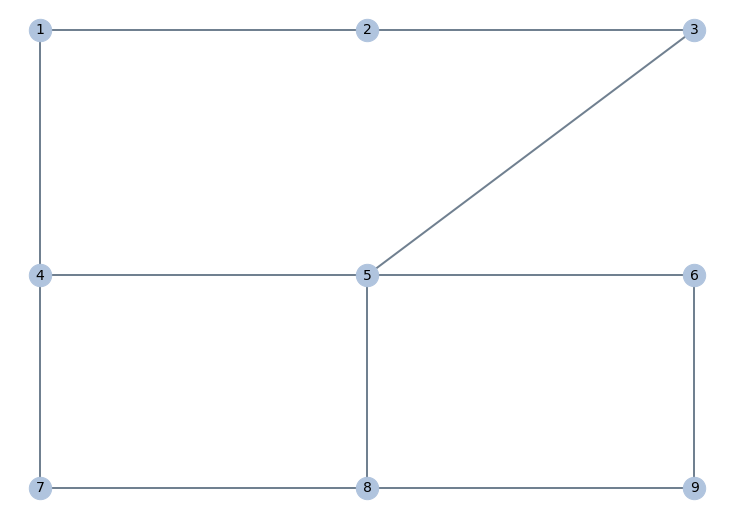

In [3]:
transp_folder = '../dreaminsg_integrated_model/data/networks/transportation/Example1'
tn = transpo.Network(
        "{}/example_net.tntp".format(transp_folder), "{}/example_trips.tntp".format(transp_folder), "{}/example_node.tntp".format(transp_folder))
plots.plot_transpo_net(transp_folder)

<Figure size 720x504 with 0 Axes>

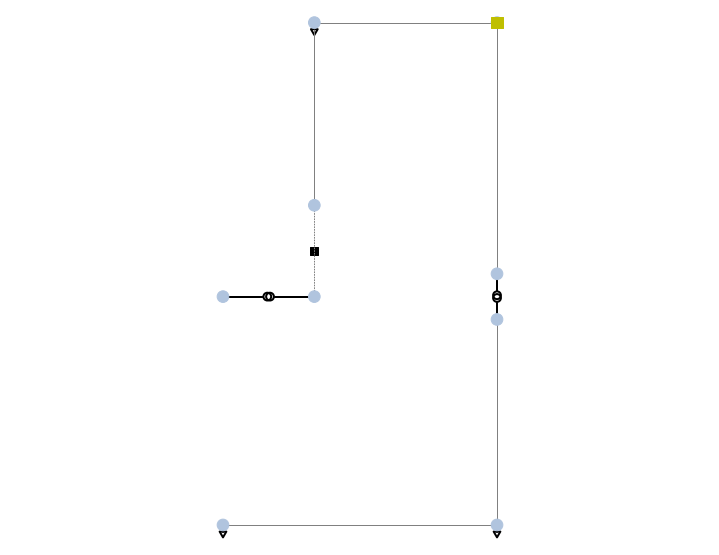

In [4]:
power_file = '../dreaminsg_integrated_model/data/networks/power/Example_power.json'
pn = pp.from_json(power_file)
plots.plot_power_net(power_file)

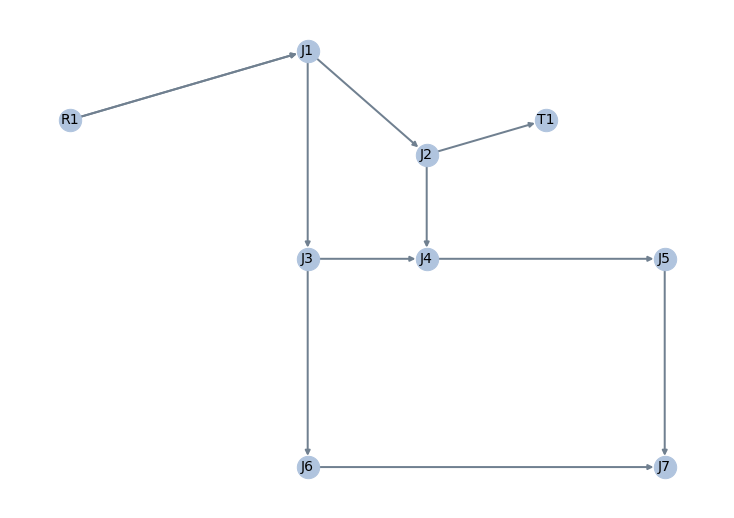

In [5]:
water_file = '../dreaminsg_integrated_model/data/networks/water/Example_water.inp'
wn = wntr.network.WaterNetworkModel(water_file) 
plots.plot_water_net(water_file)

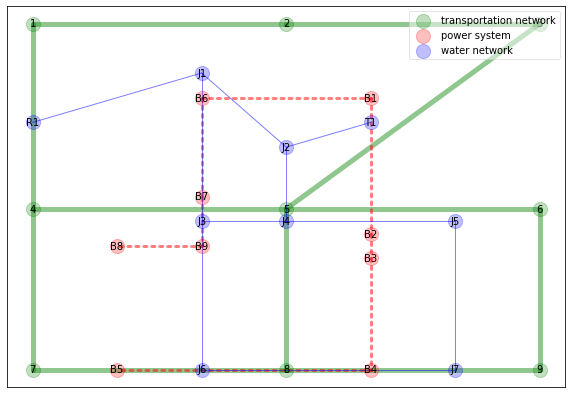

In [41]:
integrated_graph = plots.plot_integrated_network(pn, wn, tn)

In [92]:
nodes_of_interest = [x for x, y in integrated_graph.nodes(data=True) if y['type'] == "power_node"]
for node in nodes_of_interest:
    nearest_node, dist_to_nearest = interdep.get_nearest_node(integrated_graph, node, "transpo_node")
    print("The nearest transportation node to the power systems node {} is {}. The distance between the two nodes is {}m.".format(node, nearest_node, dist_to_nearest))

The nearest transportation node to the power systems node B8 is 4. The distance between the two nodes is 125.0m.
The nearest transportation node to the power systems node B7 is 5. The distance between the two nodes is 103.08m.
The nearest transportation node to the power systems node B5 is 7. The distance between the two nodes is 100.0m.
The nearest transportation node to the power systems node B4 is 8. The distance between the two nodes is 100.0m.
The nearest transportation node to the power systems node B6 is 2. The distance between the two nodes is 180.28m.
The nearest transportation node to the power systems node B2 is 5. The distance between the two nodes is 111.8m.
The nearest transportation node to the power systems node B3 is 5. The distance between the two nodes is 141.42m.
The nearest transportation node to the power systems node B1 is 2. The distance between the two nodes is 180.28m.
The nearest transportation node to the power systems node B9 is 5. The distance between the 